# Model Report

In [1]:
import logging
from time import time

import arviz as az
import matplotlib.pyplot as plt

from speclet import model_configuration
from speclet.analysis.arviz_analysis import describe_mcmc
from speclet.io import project_root
from speclet.loggers import set_console_handler_level
from speclet.managers.cache_manager import (
    get_cached_posterior,
    get_posterior_cache_name,
)
from speclet.project_configuration import get_bayesian_modeling_constants
from speclet.project_enums import ModelFitMethod

In [2]:
notebook_tic = time()
set_console_handler_level(logging.WARNING)
%config InlineBackend.figure_format = "retina"
HDI_PROB = get_bayesian_modeling_constants().hdi_prob

Parameters for papermill:

- `MODEL_NAME`: name of the model
- `FIT_METHOD`: method used to fit the model; either "ADVI" or "MCMC"
- `CONFIG_PATH`: path to configuration file
- `ROOT_CACHE_DIR`: path to the root caching directory

## Setup

### Papermill parameters

In [3]:
CONFIG_PATH = ""
MODEL_NAME = ""
FIT_METHOD_STR = ""
ROOT_CACHE_DIR = ""

In [4]:
# Parameters
MODEL_NAME = "example-specification"
FIT_METHOD_STR = "PYMC3_MCMC"
CONFIG_PATH = "models/model-configs.yaml"
ROOT_CACHE_DIR = "models"

In [5]:
FIT_METHOD = ModelFitMethod(FIT_METHOD_STR)

In [6]:
speclet_model = model_configuration.get_configuration_for_model(
    config_path=project_root() / CONFIG_PATH, name=MODEL_NAME
)
trace = get_cached_posterior(
    get_posterior_cache_name(MODEL_NAME, FIT_METHOD),
    cache_dir=project_root() / ROOT_CACHE_DIR,
)

## Fit diagnostics

R-HAT
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 1.002
    eta      float64 1.002
    mu       float64 1.002
    alpha    float64 1.001
sampled 2 chains with (unknown) tuning steps and 1,000 draws
num. divergences: 0, 0
percent divergences: 0.0, 0.0
BFMI: 1.143, 1.127
avg. step size: 0.16, 0.256


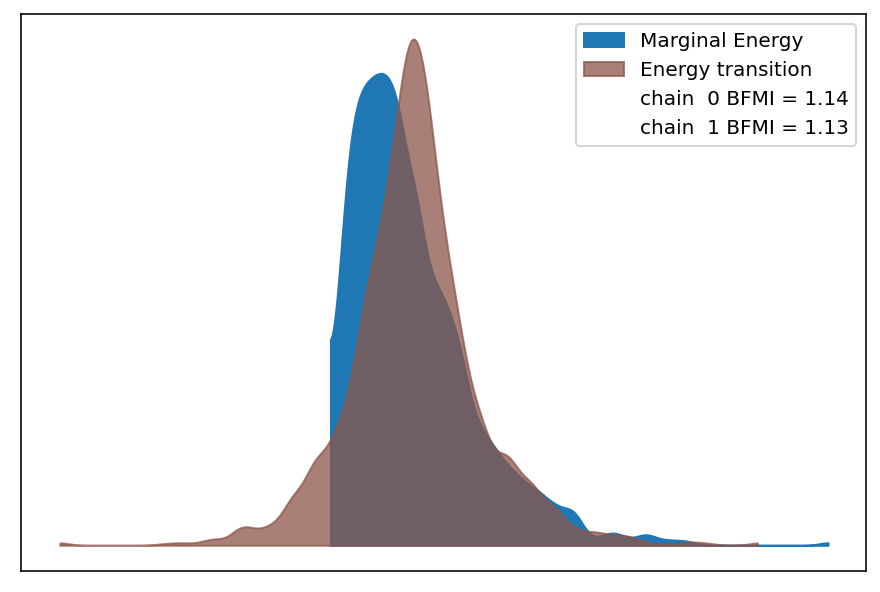

In [7]:
if "MCMC" in FIT_METHOD.value:
    print("R-HAT")
    print(az.rhat(trace))
    print("=" * 60)
    describe_mcmc(trace)

## Model parameters

In [8]:
def _as_int(x: float) -> str:
    return str(int(x))


az.summary(trace, hdi_prob=HDI_PROB).style.format(
    formatter={"ess_bulk": _as_int, "ess_tail": _as_int}, precision=2
)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta,0.09,0.01,0.07,0.12,0.00,0.00,1562,1418,1.00
eta,0.09,0.01,0.07,0.12,0.00,0.00,1562,1418,1.00
mu,1.10,0.01,1.07,1.12,0.00,0.00,1562,1418,1.00
alpha,2.63,0.08,2.50,2.75,0.00,0.00,961,831,1.00


/var/folders/r4/qpcdgl_14hbd412snp1jnv300000gn/T/ipykernel_71883/2181183454.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


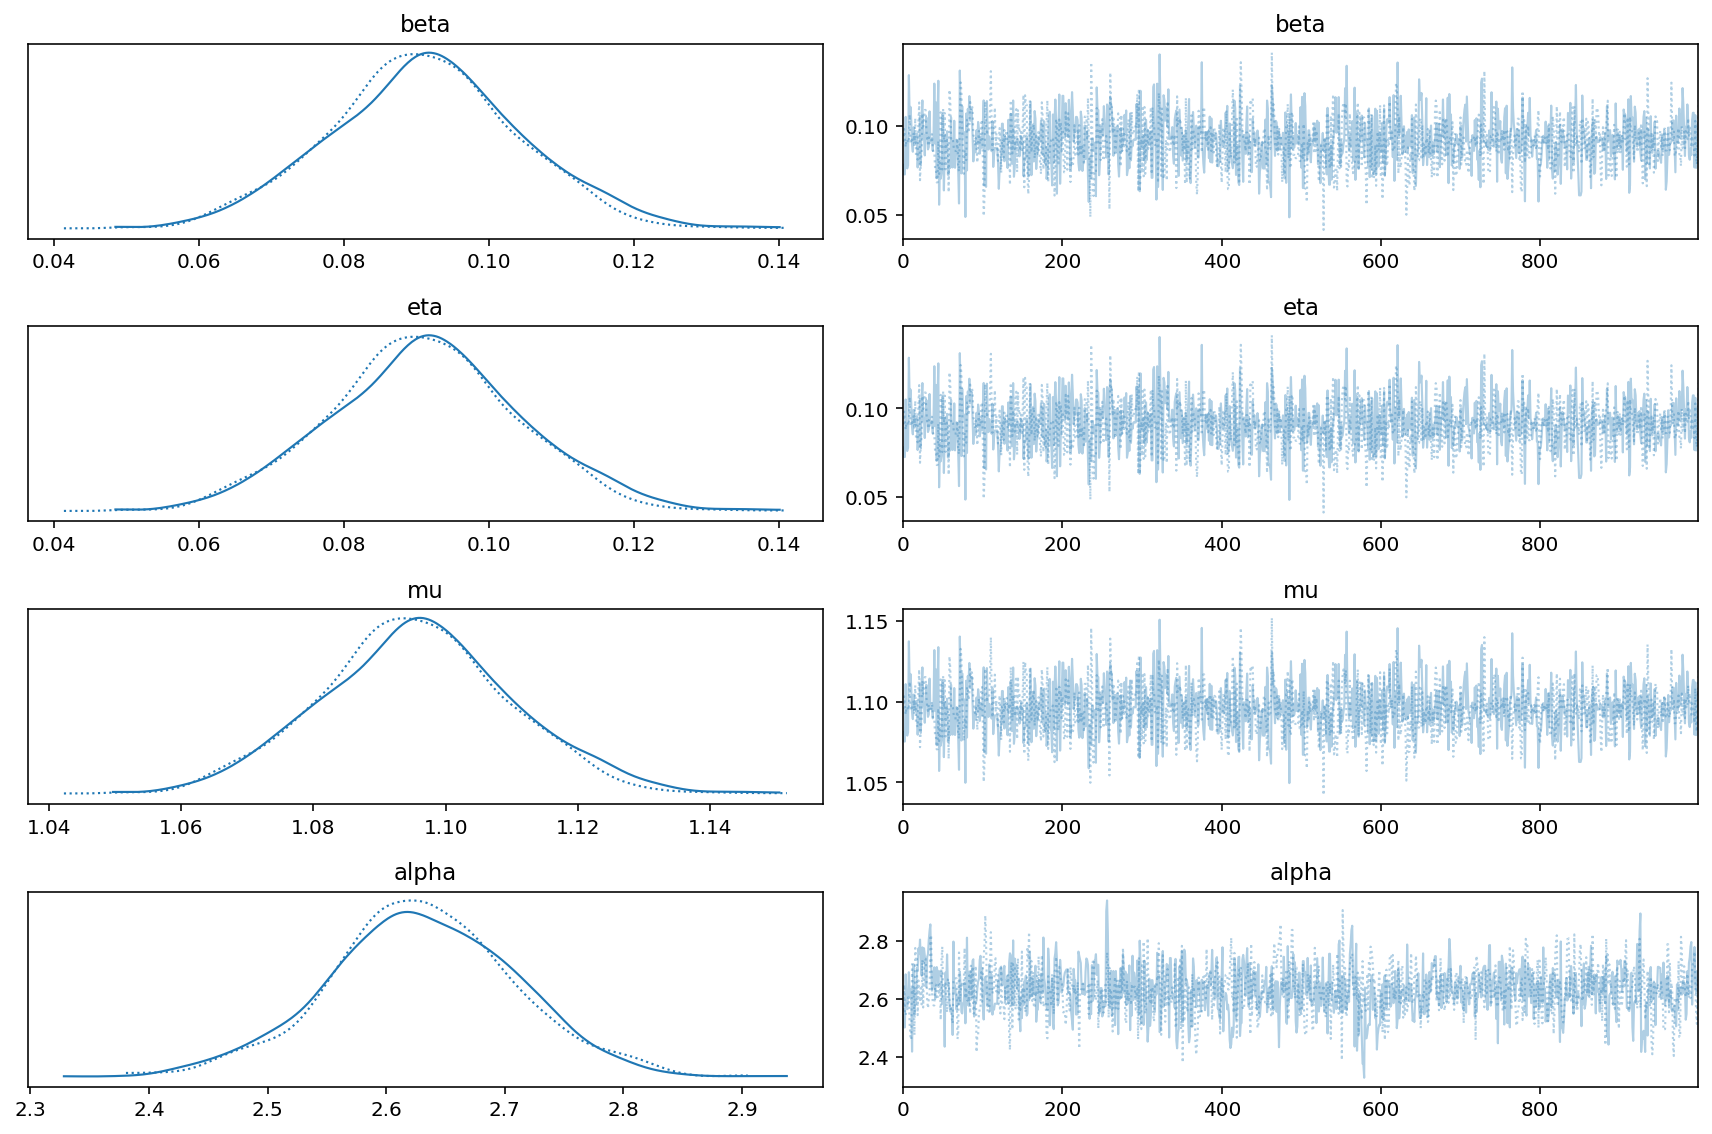

In [9]:
az.plot_trace(trace)
plt.tight_layout()
plt.show()

/var/folders/r4/qpcdgl_14hbd412snp1jnv300000gn/T/ipykernel_71883/2859506492.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


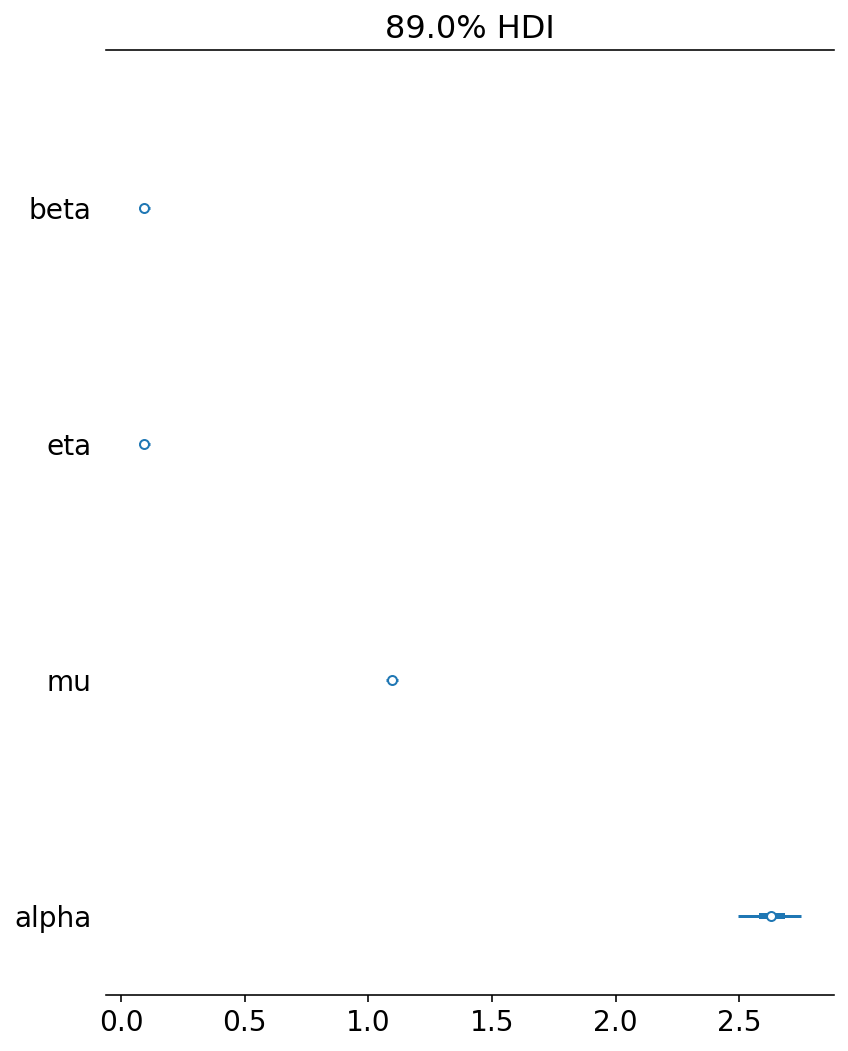

In [10]:
az.plot_forest(trace, hdi_prob=HDI_PROB, combined=True)
plt.tight_layout()
plt.show()

## Model predictions

/var/folders/r4/qpcdgl_14hbd412snp1jnv300000gn/T/ipykernel_71883/3422798424.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


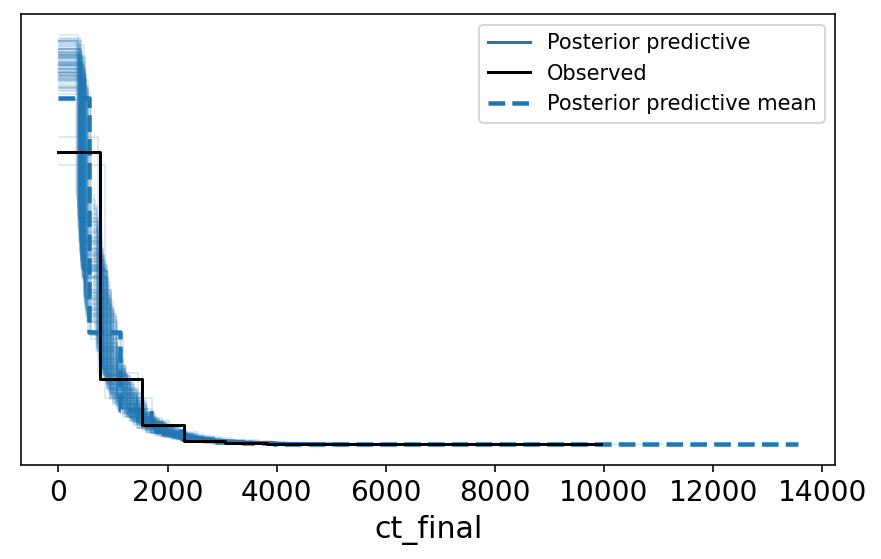

In [11]:
az.plot_ppc(trace, num_pp_samples=100, random_seed=123)
plt.tight_layout()
plt.show()

In [12]:
psis_loo = az.loo(trace, pointwise=True)
psis_loo

Computed from 2000 by 2188 log-likelihood matrix

         Estimate       SE
elpd_loo -15080.76    54.73
p_loo        4.62        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     2188  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

/var/folders/r4/qpcdgl_14hbd412snp1jnv300000gn/T/ipykernel_71883/3910446358.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


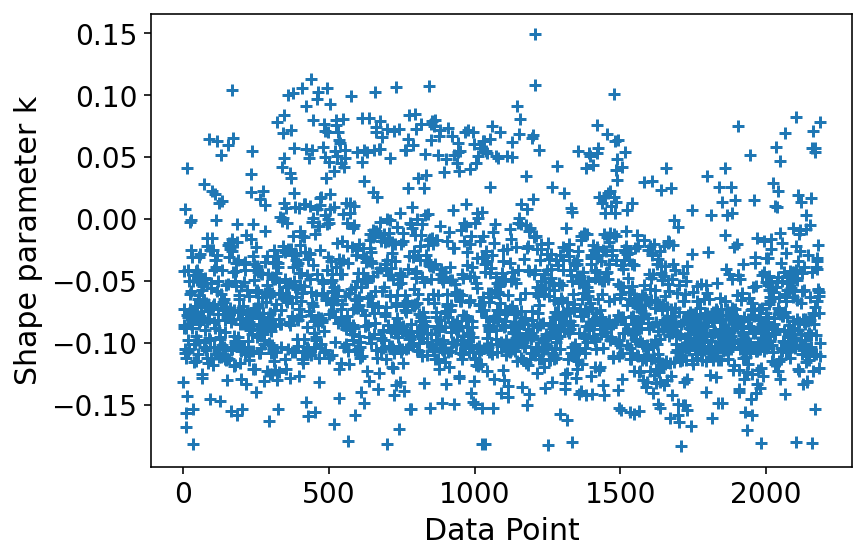

In [13]:
az.plot_khat(psis_loo)
plt.tight_layout()
plt.show()

---

In [14]:
notebook_toc = time()
print(f"execution time: {(notebook_toc - notebook_tic) / 60:.2f} minutes")

execution time: 0.12 minutes


In [15]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2022-01-13

Python implementation: CPython
Python version       : 3.9.9
IPython version      : 8.0.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: JHCookMac

Git branch: refactor-stan

arviz     : 0.11.2
speclet   : 0.0.9000
logging   : 0.5.1.2
matplotlib: 3.5.1

